<a href="https://colab.research.google.com/github/TrishKedi/datascience-seaborn-linear-reg/blob/main/Seaborn_and_Linear_Regression_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
data.shape

(5391, 6)

In [ ]:
data.isna().value_counts()

Rank   Release_Date  Movie_Title  USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
False  False         False        False                  False                False                 5391
Name: count, dtype: int64

In [ ]:
data.duplicated().value_counts()

False    5391
Name: count, dtype: int64

In [ ]:
data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [ ]:
data['Rank']

0       5293
1       5140
2       5230
3       5299
4       5222
        ... 
5386    2950
5387     126
5388      96
5389    1119
5390    2517
Name: Rank, Length: 5391, dtype: int64

In [ ]:
data['Release_Date']

0         8/2/1915
1         5/9/1916
2       12/24/1916
3        9/17/1920
4         1/1/1925
           ...    
5386     10/8/2018
5387    12/18/2018
5388    12/31/2020
5389    12/31/2020
5390    12/31/2020
Name: Release_Date, Length: 5391, dtype: object

In [ ]:
data['Movie_Title']

0                The Birth of a Nation
1                          Intolerance
2         20,000 Leagues Under the Sea
3       Over the Hill to the Poorhouse
4                       The Big Parade
                     ...              
5386                               Meg
5387                           Aquaman
5388                       Singularity
5389            Hannibal the Conqueror
5390    Story of Bonnie and Clyde, The
Name: Movie_Title, Length: 5391, dtype: object

In [ ]:
data['USD_Production_Budget']

0           $110,000
1           $385,907
2           $200,000
3           $100,000
4           $245,000
            ...     
5386     $15,000,000
5387    $160,000,000
5388    $175,000,000
5389     $50,000,000
5390     $20,000,000
Name: USD_Production_Budget, Length: 5391, dtype: object

In [ ]:
data['USD_Worldwide_Gross']

0       $11,000,000
1                $0
2        $8,000,000
3        $3,000,000
4       $22,000,000
           ...     
5386             $0
5387             $0
5388             $0
5389             $0
5390             $0
Name: USD_Worldwide_Gross, Length: 5391, dtype: object

In [ ]:
data['USD_Domestic_Gross']

0       $10,000,000
1                $0
2        $8,000,000
3        $3,000,000
4       $11,000,000
           ...     
5386             $0
5387             $0
5388             $0
5389             $0
5390             $0
Name: USD_Domestic_Gross, Length: 5391, dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace('$', '')
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace('$', '')
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace('$', '')
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace(',', '')
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace(',', '')
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace(',', '')

In [ ]:
data['USD_Production_Budget']

0          110000
1          385907
2          200000
3          100000
4          245000
          ...    
5386     15000000
5387    160000000
5388    175000000
5389     50000000
5390     20000000
Name: USD_Production_Budget, Length: 5391, dtype: object

In [ ]:
data['USD_Worldwide_Gross']

0       11000000
1              0
2        8000000
3        3000000
4       22000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: USD_Worldwide_Gross, Length: 5391, dtype: object

In [ ]:
data['USD_Domestic_Gross']

0       10000000
1              0
2        8000000
3        3000000
4       11000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: USD_Domestic_Gross, Length: 5391, dtype: object

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [ ]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].astype('float')
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].astype('float')
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].astype('float')

In [ ]:
data['USD_Production_Budget']

0          110,000.00
1          385,907.00
2          200,000.00
3          100,000.00
4          245,000.00
            ...      
5386    15,000,000.00
5387   160,000,000.00
5388   175,000,000.00
5389    50,000,000.00
5390    20,000,000.00
Name: USD_Production_Budget, Length: 5391, dtype: float64

In [ ]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [ ]:
data['Release_Date']

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]

### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
data[data['USD_Domestic_Gross'] == 0].shape

(512, 6)

In [ ]:

highest_budget_films = data.sort_values('USD_Production_Budget', ascending=False).head(20)
highest_budget_films

# data.sort_values('USD_Production_Budget', ascending=False)[data['USD_Domestic_Gross'] == 0]['Movie_Title'].values.tolist()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,"425,000,000.00","2,783,918,982.00","760,507,625.00"
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000.00","2,058,662,225.00","936,662,225.00"
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,"300,000,000.00","963,420,425.00","309,420,425.00"
4925,4,2015-06-11,Spectre,"300,000,000.00","879,620,923.00","200,074,175.00"
4333,6,2013-02-07,The Lone Ranger,"275,000,000.00","260,002,115.00","89,302,115.00"
4223,7,2012-09-03,John Carter,"275,000,000.00","282,778,100.00","73,058,679.00"
4196,5,2012-07-20,The Dark Knight Rises,"275,000,000.00","1,084,439,099.00","448,139,099.00"
3777,8,2010-11-24,Tangled,"260,000,000.00","586,581,936.00","200,821,936.00"
2885,9,2007-04-05,Spider-Man 3,"258,000,000.00","890,875,303.00","336,530,303.00"
4511,15,2013-12-13,The Hobbit: The Desolation of Smaug,"250,000,000.00","960,366,855.00","258,366,855.00"


In [ ]:
highest_budget_films[highest_budget_films['USD_Domestic_Gross'] == 0].shape

(0, 6)

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
data[data['USD_Worldwide_Gross'] == 0].shape

(357, 6)

In [ ]:
highest_budget_films[highest_budget_films['USD_Worldwide_Gross'] == 0].shape

(0, 6)

### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [ ]:
data[data['USD_Worldwide_Gross'] > 0][data['USD_Domestic_Gross'] == 0]

<ipython-input-98-1b7cd0581966>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['USD_Worldwide_Gross'] > 0][data['USD_Domestic_Gross'] == 0]


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,"3,380,000.00","3,220.00",0.00
1579,5087,2001-02-11,Everything Put Together,"500,000.00","7,890.00",0.00
1744,3695,2001-12-31,The Hole,"7,500,000.00","10,834,406.00",0.00
2155,4236,2003-12-31,Nothing,"4,000,000.00","63,180.00",0.00
2203,2513,2004-03-31,The Touch,"20,000,000.00","5,918,742.00",0.00
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,"36,000,000.00","1,480,089.00",0.00
5348,2225,2017-05-05,Chāi dàn zhuānjiā,"23,000,000.00","58,807,172.00",0.00
5360,4832,2017-07-03,Departure,"1,100,000.00","27,561.00",0.00
5372,1856,2017-08-25,Ballerina,"30,000,000.00","48,048,527.00",0.00


In [ ]:
data.query('USD_Worldwide_Gross > 0 & USD_Domestic_Gross == 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,"3,380,000.00","3,220.00",0.00
1579,5087,2001-02-11,Everything Put Together,"500,000.00","7,890.00",0.00
1744,3695,2001-12-31,The Hole,"7,500,000.00","10,834,406.00",0.00
2155,4236,2003-12-31,Nothing,"4,000,000.00","63,180.00",0.00
2203,2513,2004-03-31,The Touch,"20,000,000.00","5,918,742.00",0.00
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,"36,000,000.00","1,480,089.00",0.00
5348,2225,2017-05-05,Chāi dàn zhuānjiā,"23,000,000.00","58,807,172.00",0.00
5360,4832,2017-07-03,Departure,"1,100,000.00","27,561.00",0.00
5372,1856,2017-08-25,Ballerina,"30,000,000.00","48,048,527.00",0.00


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
unreleased_films = data[data['Release_Date'] >scrape_date]
unreleased_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5386,2950,2018-10-08,Meg,"15,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5389,1119,2020-12-31,Hannibal the Conqueror,"50,000,000.00",0.00,0.00
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The","20,000,000.00",0.00,0.00


In [ ]:
unreleased_films_indexes = unreleased_films.index.values.tolist()
unreleased_films_indexes

[5384, 5385, 5386, 5387, 5388, 5389, 5390]

In [ ]:
data_clean = data.drop(unreleased_films_indexes)
data_clean.shape

(5384, 6)

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [ ]:
films_that_lost_money = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross' )
films_that_lost_money

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00
6,4630,1927-12-08,Wings,"2,000,000.00",0.00,0.00
8,4240,1930-01-01,Hell's Angels,"4,000,000.00",0.00,0.00
15,4738,1936-05-02,Modern Times,"1,500,000.00","165,049.00","163,245.00"
17,4814,1936-10-20,"Charge of the Light Brigade, The","1,200,000.00",0.00,0.00
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,"1,000,000.00","130,874.00","130,874.00"
5373,2161,2017-08-25,Tulip Fever,"25,000,000.00",0.00,0.00
5374,4237,2017-08-25,Polina danser sa vie,"4,000,000.00","36,630.00",0.00
5381,94,2017-12-05,King Arthur: Legend of the Sword,"175,000,000.00","140,012,608.00","39,175,066.00"


# Seaborn for Data Viz: Bubble Charts

In [ ]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



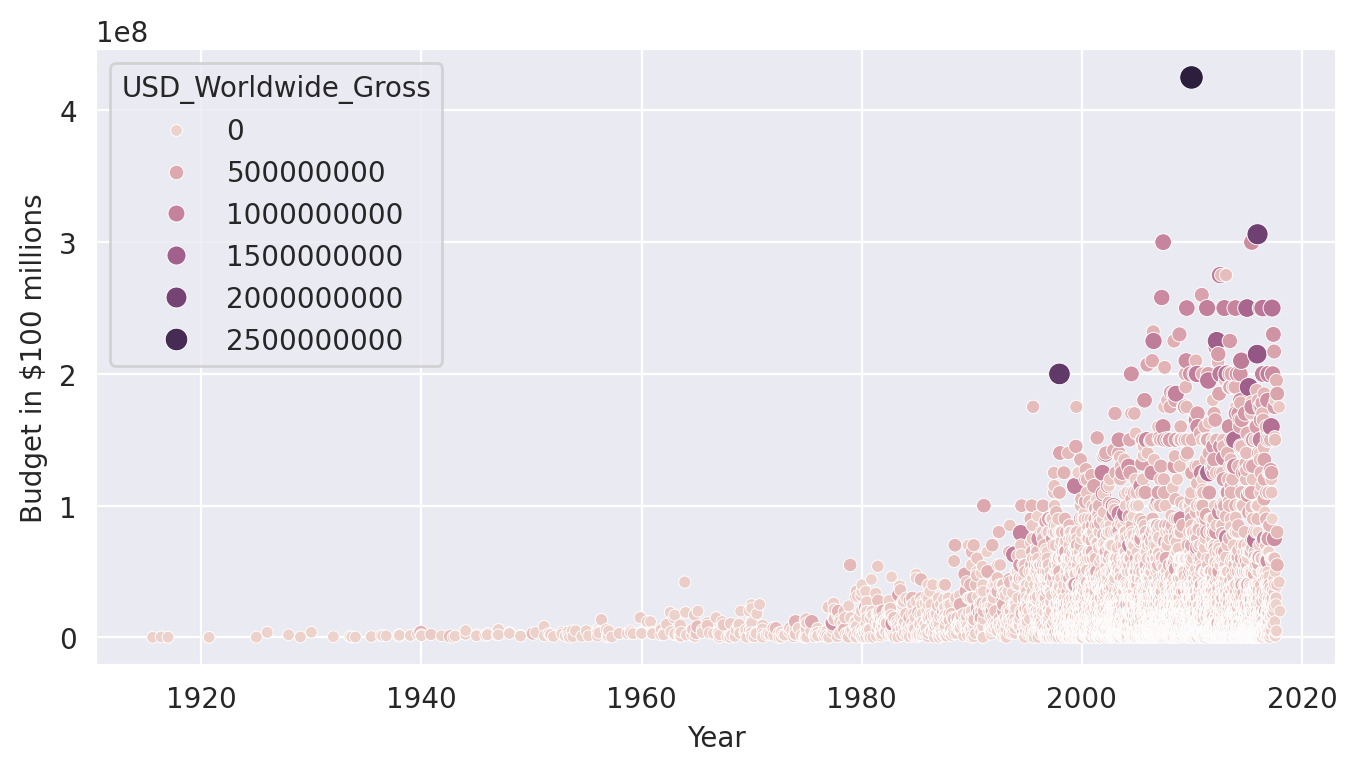

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Release_Date',
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(
        ylabel='Budget in $100 millions',
        xlabel='Year')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [ ]:
years = pd.DatetimeIndex(data_clean['Release_Date']).year

In [ ]:
decades = years//10*10
data_clean['Decade'] = decades
data_clean.head(20)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00",1910
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00",1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00",1920
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00",1920
5,4250,1925-12-30,Ben-Hur,"3,900,000.00","9,000,000.00","9,000,000.00",1920
6,4630,1927-12-08,Wings,"2,000,000.00",0.00,0.00,1920
7,5141,1929-01-02,The Broadway Melody,"379,000.00","4,358,000.00","2,800,000.00",1920
8,4240,1930-01-01,Hell's Angels,"4,000,000.00",0.00,0.00,1930
9,5043,1931-12-31,Mata Hari,"558,000.00","900,000.00","900,000.00",1930


In [ ]:
data_clean['Decade']

0       1910
1       1910
2       1910
3       1920
4       1920
        ... 
5379    2010
5380    2010
5381    2010
5382    2010
5383    2010
Name: Decade, Length: 5384, dtype: int32

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
old_films = data_clean[data_clean['Decade'] < 1970]
old_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00",1910
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00",1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00",1920
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00",1920


In [ ]:
old_films.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
148,2375,1969-10-15,Paint Your Wagon,"20,000,000.00","31,678,778.00","31,678,778.00",1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,"6,000,000.00","102,308,900.00","102,308,900.00",1960
150,2175,1969-12-16,"Hello, Dolly","24,000,000.00","33,208,099.00","33,208,099.00",1960
151,3613,1969-12-18,On Her Majesty's Secret Service,"8,000,000.00","82,000,000.00","22,800,000.00",1960
152,4195,1969-12-19,Topaz,"4,000,000.00","6,000,000.00","6,000,000.00",1960


In [ ]:
new_films = data_clean[data_clean['Decade'] >= 1970]
new_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,"25,000,000.00",0.00,0.00,1970
154,2270,1970-01-01,Darling Lili,"22,000,000.00","5,000,000.00","5,000,000.00",1970
155,3136,1970-01-01,Patton,"12,000,000.00","62,500,000.00","62,500,000.00",1970
156,3277,1970-01-01,The Molly Maguires,"11,000,000.00","2,200,000.00","2,200,000.00",1970
157,4265,1970-01-01,M*A*S*H,"3,500,000.00","81,600,000.00","81,600,000.00",1970


In [ ]:
new_films.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
5379,1295,2017-10-02,John Wick: Chapter Two,"40,000,000.00","166,893,990.00","92,029,184.00",2010
5380,70,2017-10-03,Kong: Skull Island,"185,000,000.00","561,137,727.00","168,052,812.00",2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,"175,000,000.00","140,012,608.00","39,175,066.00",2010
5382,1254,2017-12-05,Snatched,"42,000,000.00","57,850,343.00","45,850,343.00",2010
5383,2521,2017-12-31,The Thousand Miles,"20,000,000.00",0.00,0.00,2010


# Seaborn Regression Plots

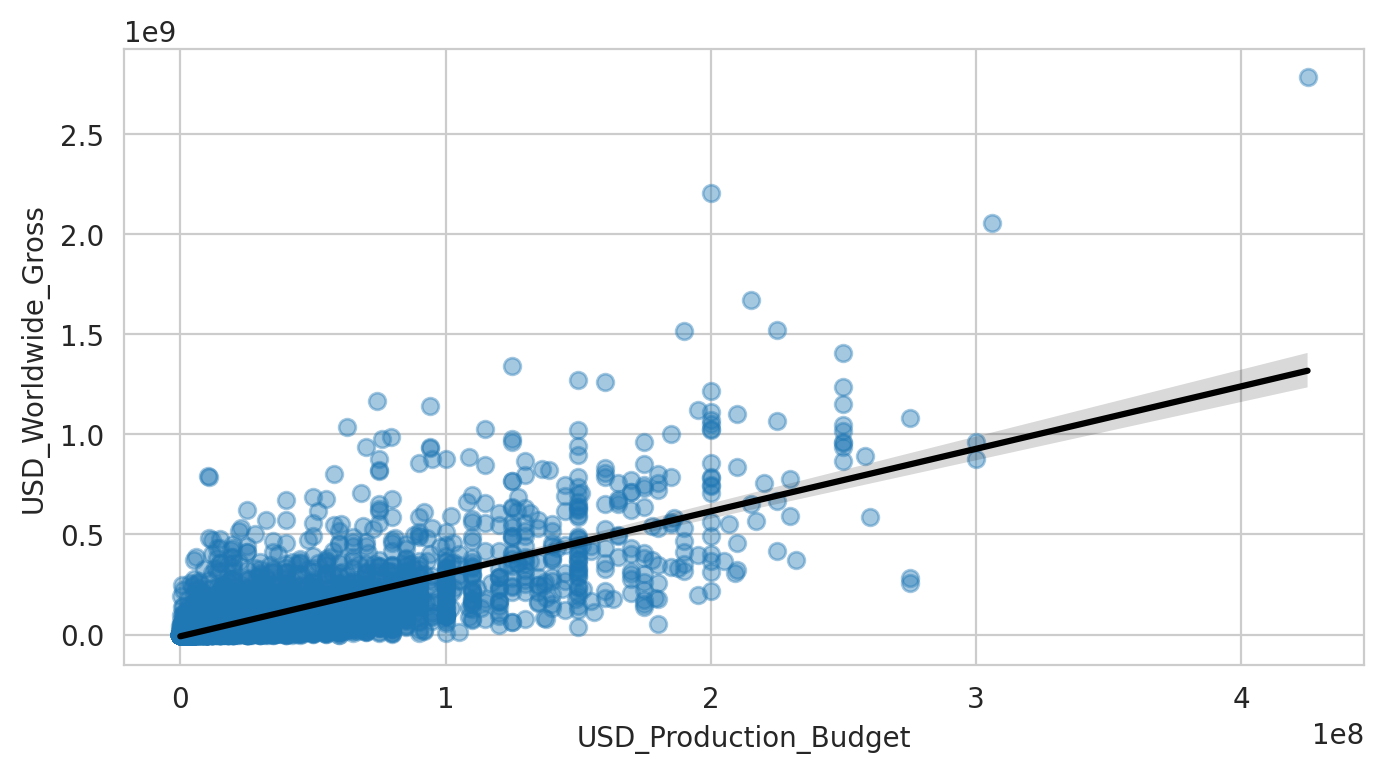

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=new_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

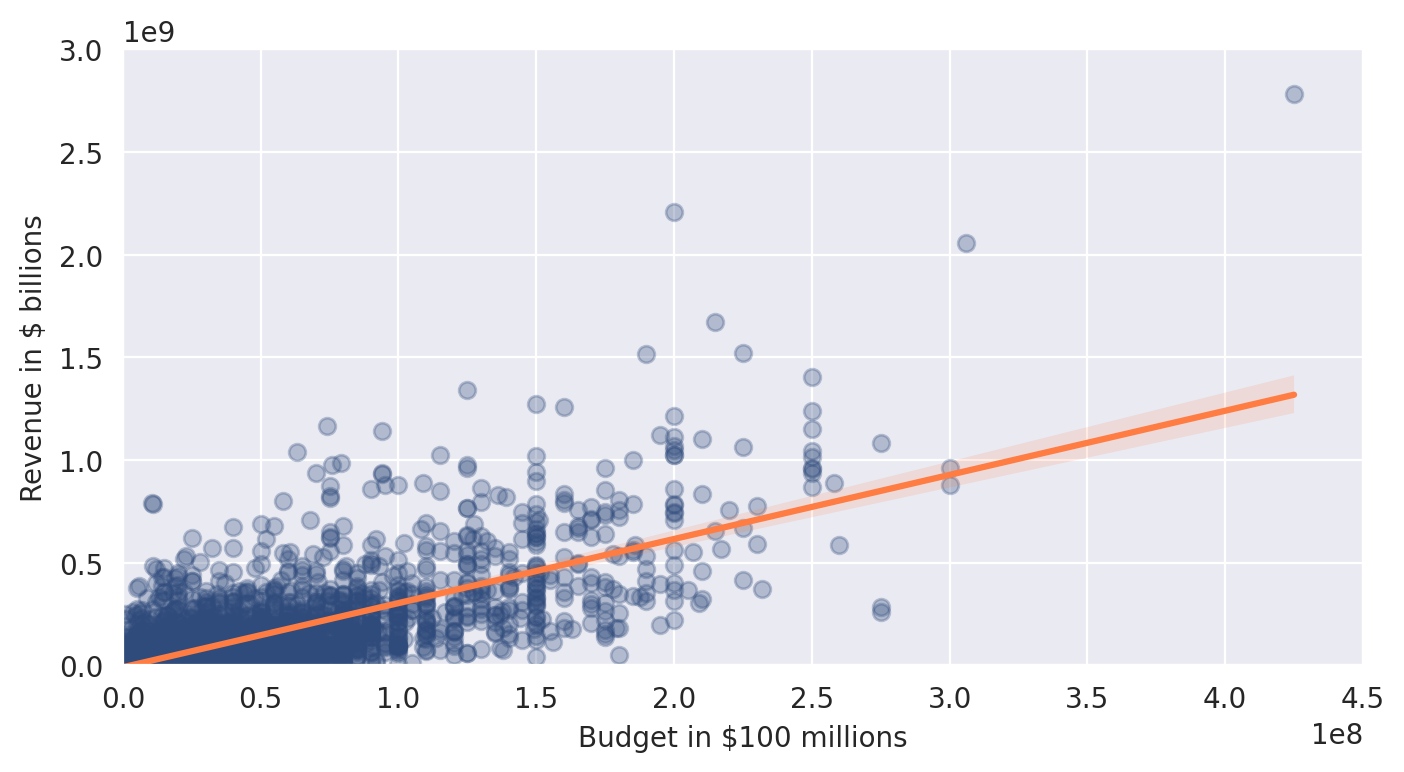

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?